In [1]:
# Import of libraries

# System libraries
import random
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Rdkit para carregar a estrutura química e desenhá-la
from rdkit import Chem
from rdkit.Chem import Draw

# Model traing
from keras.preprocessing.sequence import pad_sequences

# Importar display para mostrar imagens no Jupyterfrom keras.preprocessing.sequence import pad_sequences
from IPython.display import display

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.8.0
Author: Library versions

matplotlib: 3.7.5
keras     : 2.13.1
plotly    : 6.1.2
seaborn   : 0.13.2
pandas    : 2.0.3
numpy     : 1.24.3
watermark : 2.5.0
platform  : 1.0.8
rdkit     : 2022.09.5
IPython   : 8.12.3
re        : 2.2.1



In [2]:
# Database
df = pd.read_csv("Datasets\pdb_data_no_dups.csv")
df2 = pd.read_csv("Datasets\pdb_data_seq.csv")

In [3]:
# Merge dataset
# Merge
data_merge = df.merge(df2,how='inner',on='structureId')
data_merge.rename({'macromoleculeType_x':'macromoleculeType','residueCount_y':'residueCount'},axis=1,inplace=True)
data_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)
data_merge

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20
2,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24
3,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469653,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388
469654,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572
469655,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572
469656,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572


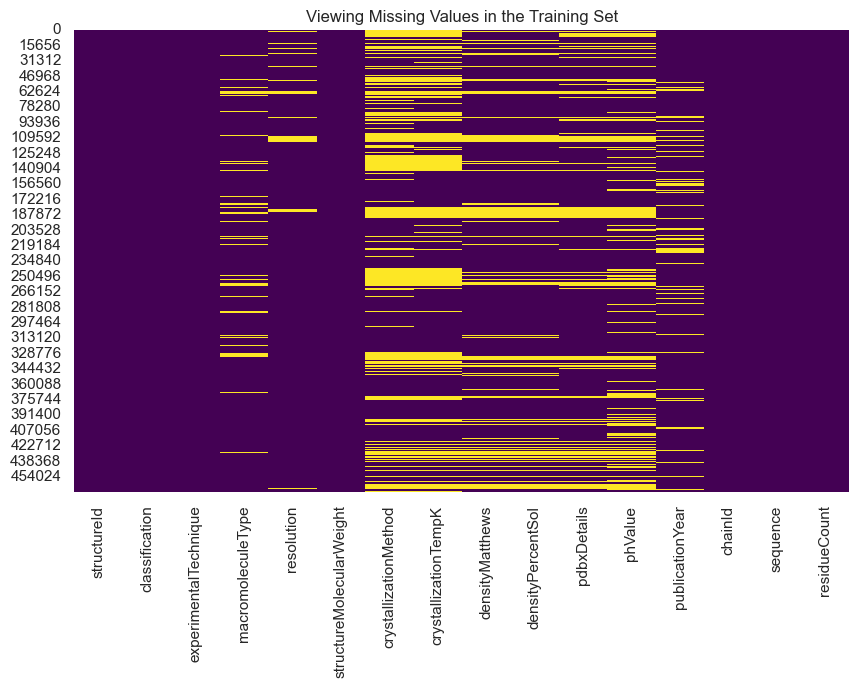

In [4]:
# View missing values

plt.figure(figsize=(10, 6))
sns.heatmap(data_merge.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

In [5]:
# Tampilkan jumlah baris dan missing values SEBELUM di-drop
print("SEBELUM dropna:")
print("Jumlah baris:", len(data_merge))
print("Missing values per kolom:")
print(data_merge[[
    'classification', 'macromoleculeType', 'resolution',
    'crystallizationMethod', 'crystallizationTempK',
    'densityMatthews', 'densityPercentSol',
    'pdbxDetails', 'phValue', 'publicationYear'
]].isnull().sum())

# Simpan salinan sebelum di-drop (opsional)
data_before = data_merge.copy()

# Drop baris dengan null di kolom-kolom tertentu
data_merge = data_merge.dropna(subset=[
    'classification', 'macromoleculeType', 'resolution',
    'crystallizationMethod', 'crystallizationTempK',
    'densityMatthews', 'densityPercentSol',
    'pdbxDetails', 'phValue', 'publicationYear'
])

# Tampilkan jumlah baris dan missing values SETELAH di-drop
print("\nSESUDAH dropna:")
print("Jumlah baris:", len(data_merge))
print("Missing values per kolom:")
print(data_merge[[
    'classification', 'macromoleculeType', 'resolution',
    'crystallizationMethod', 'crystallizationTempK',
    'densityMatthews', 'densityPercentSol',
    'pdbxDetails', 'phValue', 'publicationYear'
]].isnull().sum())


SEBELUM dropna:
Jumlah baris: 469658
Missing values per kolom:
classification                4
macromoleculeType         35741
resolution                21616
crystallizationMethod    155995
crystallizationTempK     153062
densityMatthews           81305
densityPercentSol         81182
pdbxDetails               85470
phValue                  129974
publicationYear           57337
dtype: int64

SESUDAH dropna:
Jumlah baris: 214575
Missing values per kolom:
classification           0
macromoleculeType        0
resolution               0
crystallizationMethod    0
crystallizationTempK     0
densityMatthews          0
densityPercentSol        0
pdbxDetails              0
phValue                  0
publicationYear          0
dtype: int64


In [6]:
data_merge.shape

(214575, 16)

In [7]:
data_merge.classification.value_counts().head(20)

classification
HYDROLASE                            23037
RIBOSOME                             19121
TRANSFERASE                          18177
OXIDOREDUCTASE                       16998
IMMUNE SYSTEM                         9690
HYDROLASE/HYDROLASE INHIBITOR         8958
LYASE                                 6210
TRANSCRIPTION                         4924
TRANSPORT PROTEIN                     4062
VIRAL PROTEIN                         4006
ISOMERASE                             3201
SIGNALING PROTEIN                     3123
LIGASE                                2946
PROTEIN BINDING                       2774
TRANSFERASE/TRANSFERASE INHIBITOR     2267
MEMBRANE PROTEIN                      2177
SUGAR BINDING PROTEIN                 2113
TRANSFERASE/DNA                       1983
DNA BINDING PROTEIN                   1888
STRUCTURAL PROTEIN                    1691
Name: count, dtype: int64

In [8]:
def preprocess_protein_data(data, class_mapping, columns):
    # Transform 'classification' into 'Target'
    data['Target'] = data['classification'].map(class_mapping)

    # Reduce the dataset to specified columns and remove null values
    data_reduced = data[columns].dropna()
    return data_reduced

# Example of using the function
class_dict = {'HYDROLASE': 1, 'TRANSFERASE': 2, 'OXIDOREDUCTASE': 3}
columns_to_keep = ["experimentalTechnique", "macromoleculeType", "resolution", "structureMolecularWeight",
                   "crystallizationMethod", "crystallizationTempK", "densityMatthews", "densityPercentSol",
                   "pdbxDetails", "phValue", "publicationYear", "chainId", "sequence", "residueCount", "Target"]

# Apply the function
data_protein_base = preprocess_protein_data(data_merge, class_dict, columns_to_keep)

# Mapping Target values to 0, 1, 2
target_mapping = {1.0: 0,
                  2.0: 1,
                  3.0: 2}

# Apply the mapping to the Target column
data_protein_base['Target'] = data_protein_base['Target'].map(target_mapping)

# Check the result
data_protein_base.head(20)


,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount,Target
912,X-RAY DIFFRACTION,Protein,2.60,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,CRYSTALS GROWN FROM 4 MICROLITER HANGING DROPS...,8.40,1998.0,A,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,374,2
2184,X-RAY DIFFRACTION,Protein,1.90,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402,2
2185,X-RAY DIFFRACTION,Protein,1.90,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402,2
2186,X-RAY DIFFRACTION,Protein,1.60,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402,2
2187,X-RAY DIFFRACTION,Protein,1.60,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402,2
2368,X-RAY DIFFRACTION,Protein,2.33,24203.73,"VAPOR DIFFUSION, HANGING DROP",277.0,2.25,45.00,"HANGING DROPS AT 4 C, pH 8.0, vapor diffusion ...",8.00,1997.0,A,ELIRVAILWHEMWHEGLEEASRLYFGERNVKGMFEVLEPLHAMMER...,200,1
2369,X-RAY DIFFRACTION,Protein,2.33,24203.73,"VAPOR DIFFUSION, HANGING DROP",277.0,2.25,45.00,"HANGING DROPS AT 4 C, pH 8.0, vapor diffusion ...",8.00,1997.0,B,ELIRVAILWHEMWHEGLEEASRLYFGERNVKGMFEVLEPLHAMMER...,200,1
2373,X-RAY DIFFRACTION,Protein,2.10,52423.45,"VAPOR DIFFUSION, HANGING DROP",291.0,3.30,63.00,PROTEIN WAS CRYSTALLIZED BY VAPOR DIFFUSION IN...,5.40,1998.0,A,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,489,0
2447,X-RAY DIFFRACTION,Protein,1.55,45514.38,vapor diffusion - hanging drop - microseeding,277.0,2.06,31.70,"FROM 2.15 M (NH4)2SO4, 55 MG/ML PROTEIN, 4 DEG...",6.15,1998.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402,2
2448,X-RAY DIFFRACTION,Protein,1.55,45514.38,vapor diffusion - hanging drop - microseeding,277.0,2.06,31.70,"FROM 2.15 M (NH4)2SO4, 55 MG/ML PROTEIN, 4 DEG...",6.15,1998.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402,2


In [9]:
for col in data_protein_base.columns:
    unique_values = data_protein_base[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("-" * 60)


Unique values in column 'experimentalTechnique':
['X-RAY DIFFRACTION' 'POWDER DIFFRACTION' 'X-RAY DIFFRACTION, EPR'
 'EPR, X-RAY DIFFRACTION' 'NEUTRON DIFFRACTION' 'ELECTRON CRYSTALLOGRAPHY']
------------------------------------------------------------
Unique values in column 'macromoleculeType':
['Protein' 'Protein#DNA' 'Protein#DNA#RNA' 'Protein#RNA'
 'Protein#DNA#DNA/RNA Hybrid']
------------------------------------------------------------
Unique values in column 'resolution':
[2.6  1.9  1.6  2.33 2.1  1.55 2.   1.84 2.2  2.5  2.8  1.7  2.3  1.8
 1.73 2.53 1.2  2.7  2.52 1.4  4.5  4.2  2.25 1.83 1.88 2.16 2.39 2.4
 1.   3.   1.85 1.5  1.58 3.2  2.58 1.02 1.42 1.06 1.68 1.65 2.02 1.97
 2.47 1.95 1.71 1.93 1.75 1.89 2.06 2.94 1.78 2.05 2.12 2.9  1.81 1.21
 1.69 2.15 2.23 1.96 2.44 4.4  2.65 2.01 2.51 2.35 2.75 2.38 2.28 1.54
 2.31 2.29 1.64 2.45 3.16 2.56 2.03 1.86 2.67 3.1  1.76 2.13 2.48 2.61
 1.3  1.45 1.05 1.82 3.19 2.54 1.72 2.32 1.77 2.63 1.35 2.69 2.95 3.5
 1.62 2.27 2.36 1.66 

In [10]:
# Check the result
print(data_protein_base['Target'].value_counts())

Target
0    23037
1    18177
2    16997
Name: count, dtype: int64


In [11]:
data_protein_base['macromoleculeType'] = data_protein_base['macromoleculeType'].astype('category')
data_protein_base.dtypes

experimentalTechnique         object
macromoleculeType           category
resolution                   float64
structureMolecularWeight     float64
crystallizationMethod         object
crystallizationTempK         float64
densityMatthews              float64
densityPercentSol            float64
pdbxDetails                   object
phValue                      float64
publicationYear              float64
chainId                       object
sequence                      object
residueCount                   int64
Target                         int64
dtype: object

In [12]:
print(data_protein_base['macromoleculeType'].unique())

['Protein', 'Protein#DNA', 'Protein#DNA#RNA', 'Protein#RNA', 'Protein#DNA#DNA/RNA Hybrid']
Categories (5, object): ['Protein', 'Protein#DNA', 'Protein#DNA#DNA/RNA Hybrid', 'Protein#DNA#RNA', 'Protein#RNA']


In [13]:
# Remove null values
data_protein_base = data_protein_base.dropna(subset=['macromoleculeType', 'residueCount'])

# Replace special characters in 'macromoleculeType'
data_protein_base['macromoleculeType'] = data_protein_base['macromoleculeType'].str.replace('#', ' ')
data_protein_base['macromoleculeType'] = data_protein_base['macromoleculeType'].str.replace('/', ' ')

print(data_protein_base['macromoleculeType'].unique())

['Protein' 'Protein DNA' 'Protein DNA RNA' 'Protein RNA'
 'Protein DNA DNA RNA Hybrid']


In [14]:
# Remove null values from the relevant columns in the original dataset
data_protein_base = data_protein_base.dropna(subset=['macromoleculeType', 'residueCount'])

# Recreate 'summary_data' directly by grouping and calculating the mean
summary_data = data_protein_base.groupby('macromoleculeType', as_index=False)['residueCount'].mean()

# Check if 'summary_data' is structured correctly before plotting
summary_data.columns
summary_data.dtypes
summary_data.head(n=3)

,macromoleculeType,residueCount
0,Protein,1758.495649
1,Protein DNA,849.267943
2,Protein DNA DNA RNA Hybrid,1424.000000


<Axes: xlabel='phValue', ylabel='macromoleculeType'>

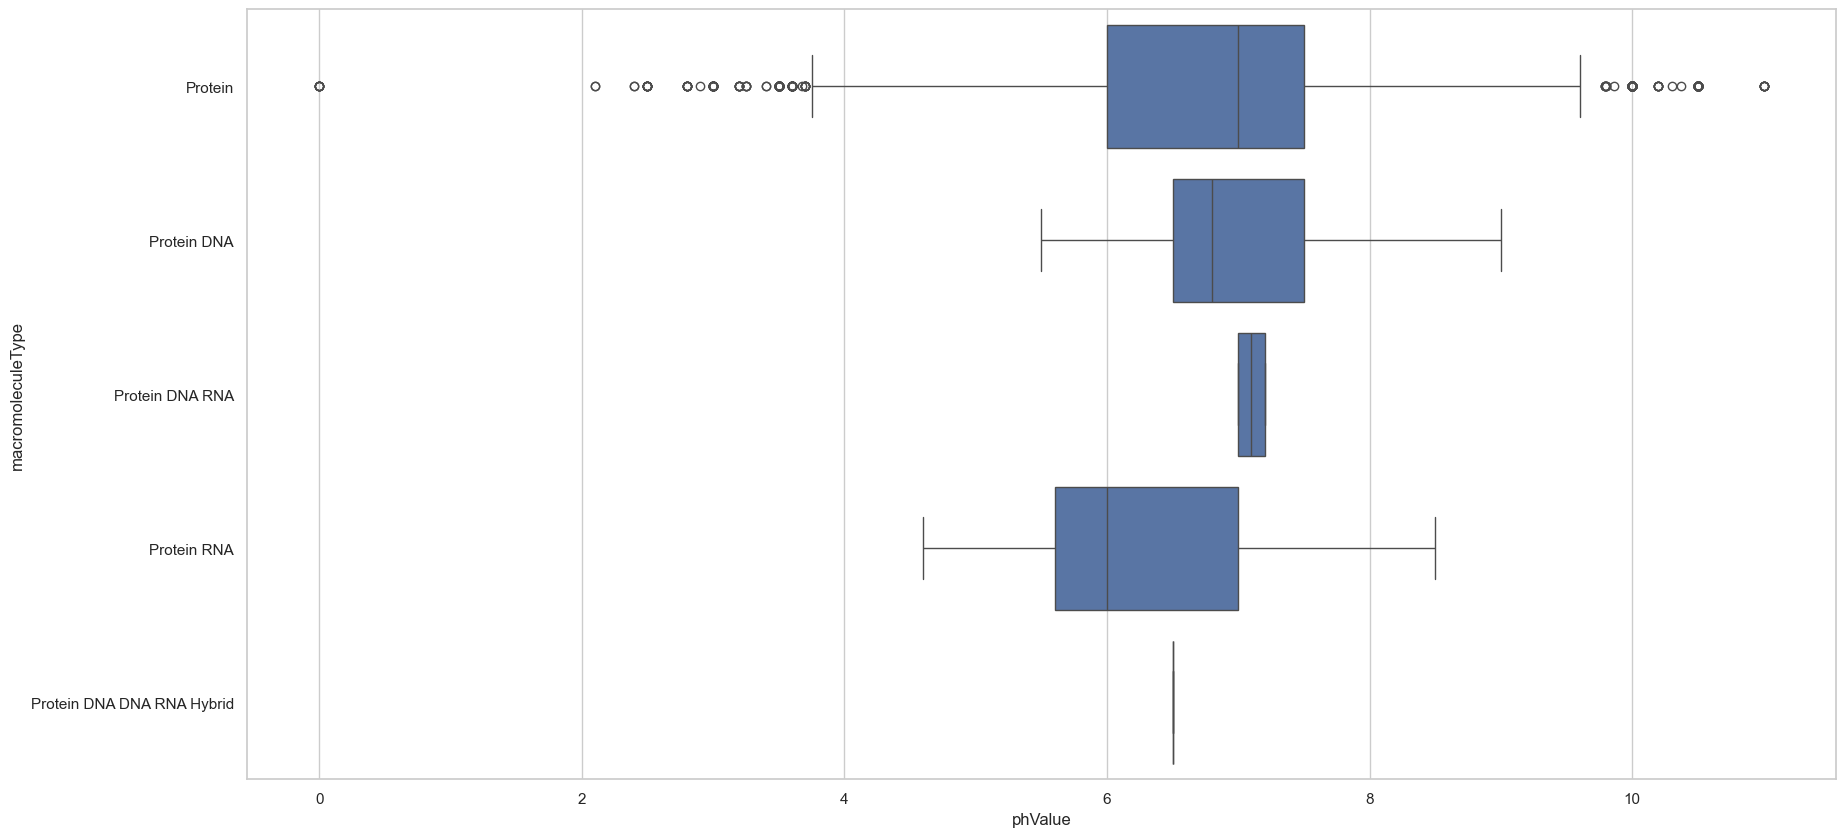

In [15]:
plt.figure(figsize=(20.5, 10))
sns.boxplot(x="phValue", y="macromoleculeType", data=data_protein_base)

<Axes: xlabel='residueCount', ylabel='macromoleculeType'>

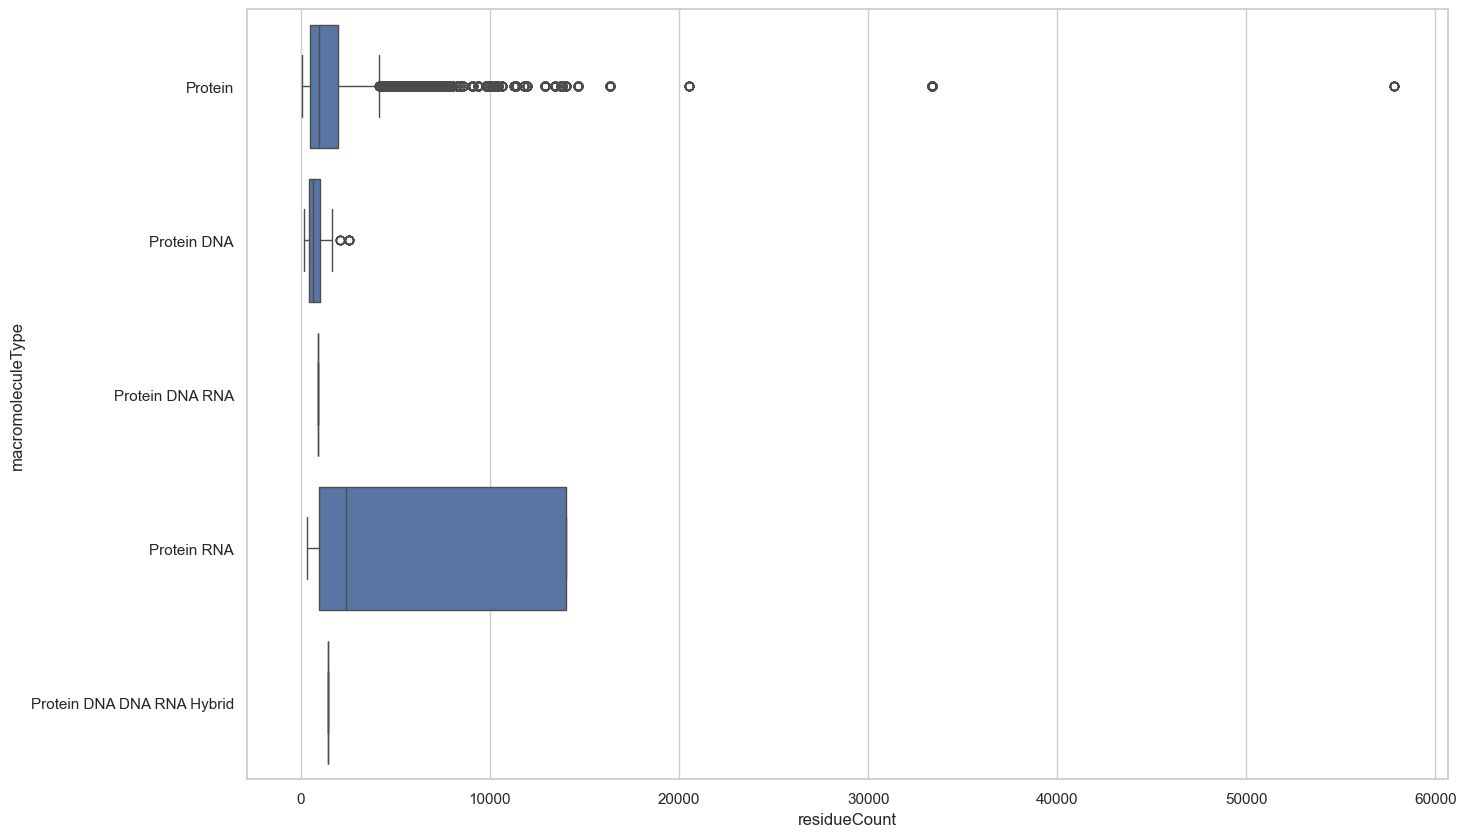

In [16]:
plt.figure(figsize=(15.5, 10))
sns.boxplot(x="residueCount", y="macromoleculeType", data=data_protein_base)

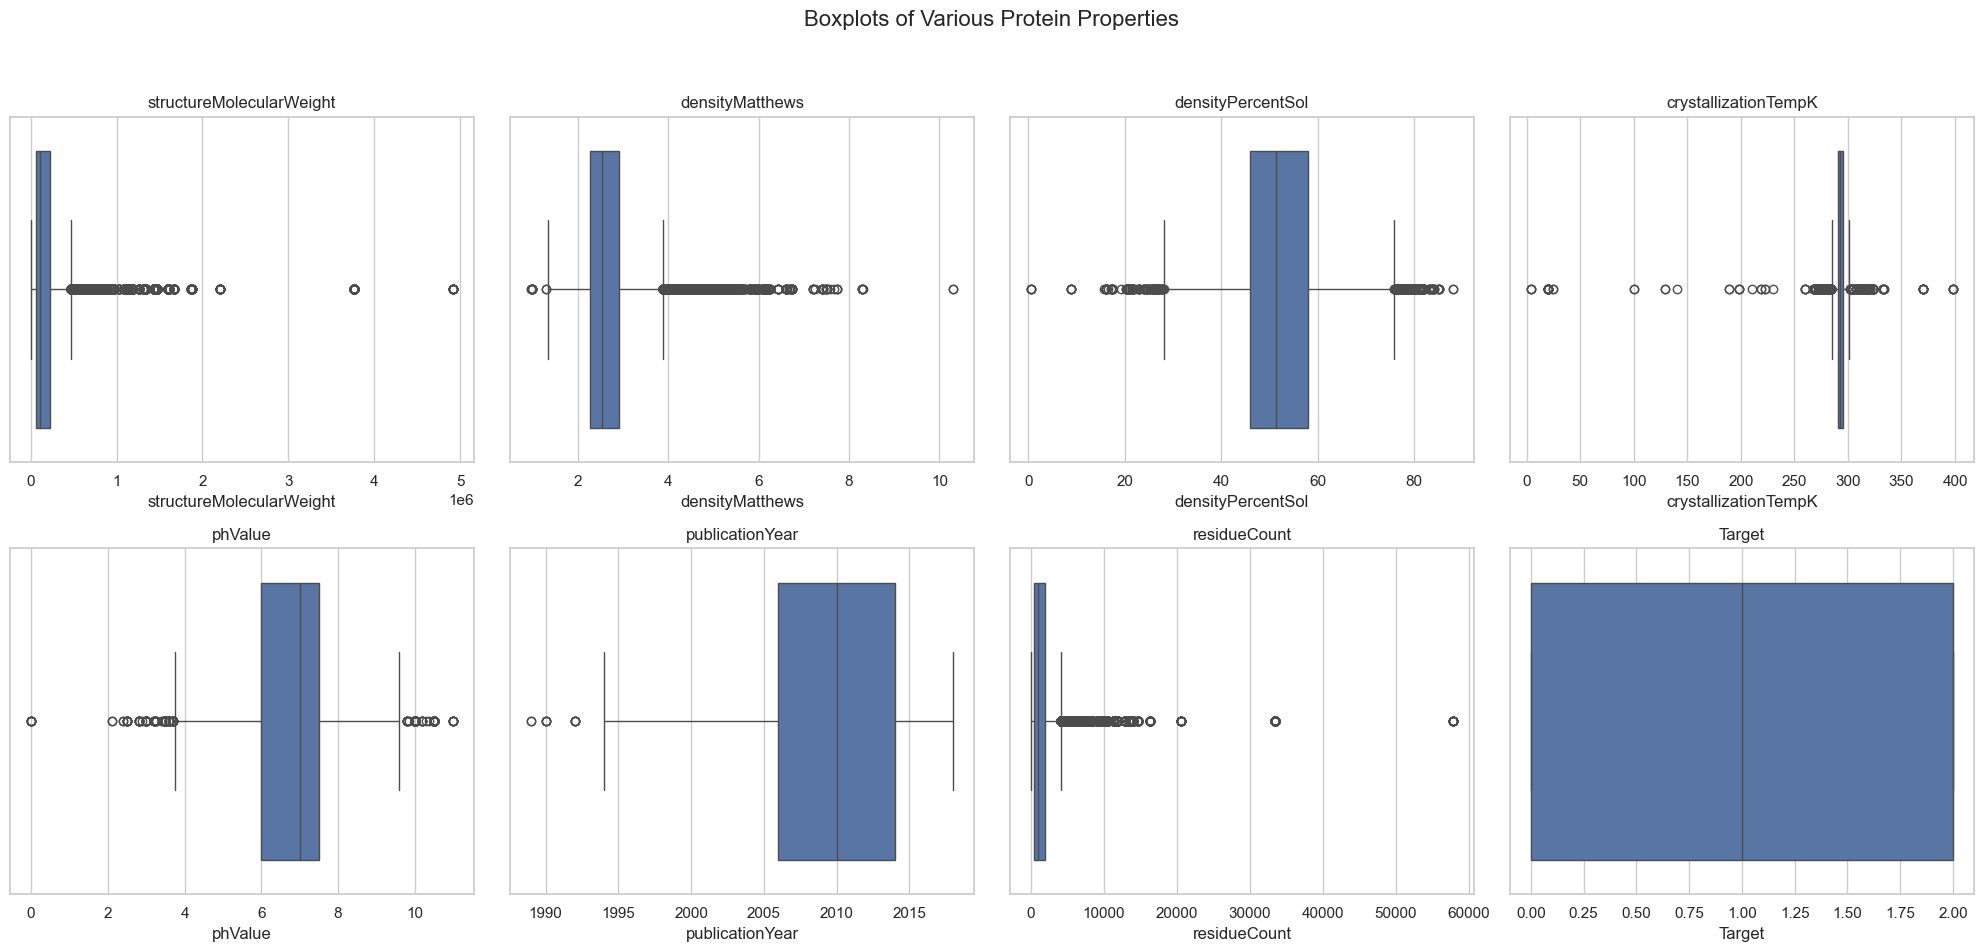

In [17]:
# List of columns to be used for plotting
columns = ["structureMolecularWeight", "densityMatthews", "densityPercentSol",
           "crystallizationTempK", "phValue", "publicationYear", "residueCount", "Target"]

# Define the figure with subplots (2 rows and 4 columns, adjust as needed)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Boxplots of Various Protein Properties", fontsize=16)

# Create boxplots for each column in a subplot
for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(data=data_protein_base, x=col, ax=ax)
    ax.set_title(f"{col}")

# Adjust layout to prevent overlap of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [18]:
# List of columns to apply outlier removal
columns = ["structureMolecularWeight", "densityMatthews", "densityPercentSol",
           "crystallizationTempK", "phValue", "publicationYear", "residueCount", "Target"]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to the dataframe
data_protein_base_cleaned = remove_outliers(data_protein_base, columns)

# Check the result of outlier removal
data_protein_base_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
resolution,38723.0,2.128324,0.486544,0.70,1.80,2.10,2.42,7.35
structureMolecularWeight,38723.0,112180.373470,78423.255114,4614.91,48836.07,90707.93,155678.17,357582.94
crystallizationTempK,38723.0,293.909413,3.014782,285.00,292.15,293.00,298.00,301.00
densityMatthews,38723.0,2.525084,0.402102,1.42,2.23,2.44,2.76,3.78
densityPercentSol,38723.0,50.080341,7.442247,29.36,44.83,49.57,55.38,70.98
phValue,38723.0,6.756145,1.223573,3.75,6.00,7.00,7.50,9.60
publicationYear,38723.0,2010.183560,4.939287,1994.00,2006.00,2011.00,2014.00,2018.00
residueCount,38723.0,993.062831,696.196198,38.00,432.00,800.00,1382.00,3084.00
Target,38723.0,0.876404,0.811958,0.00,0.00,1.00,2.00,2.00


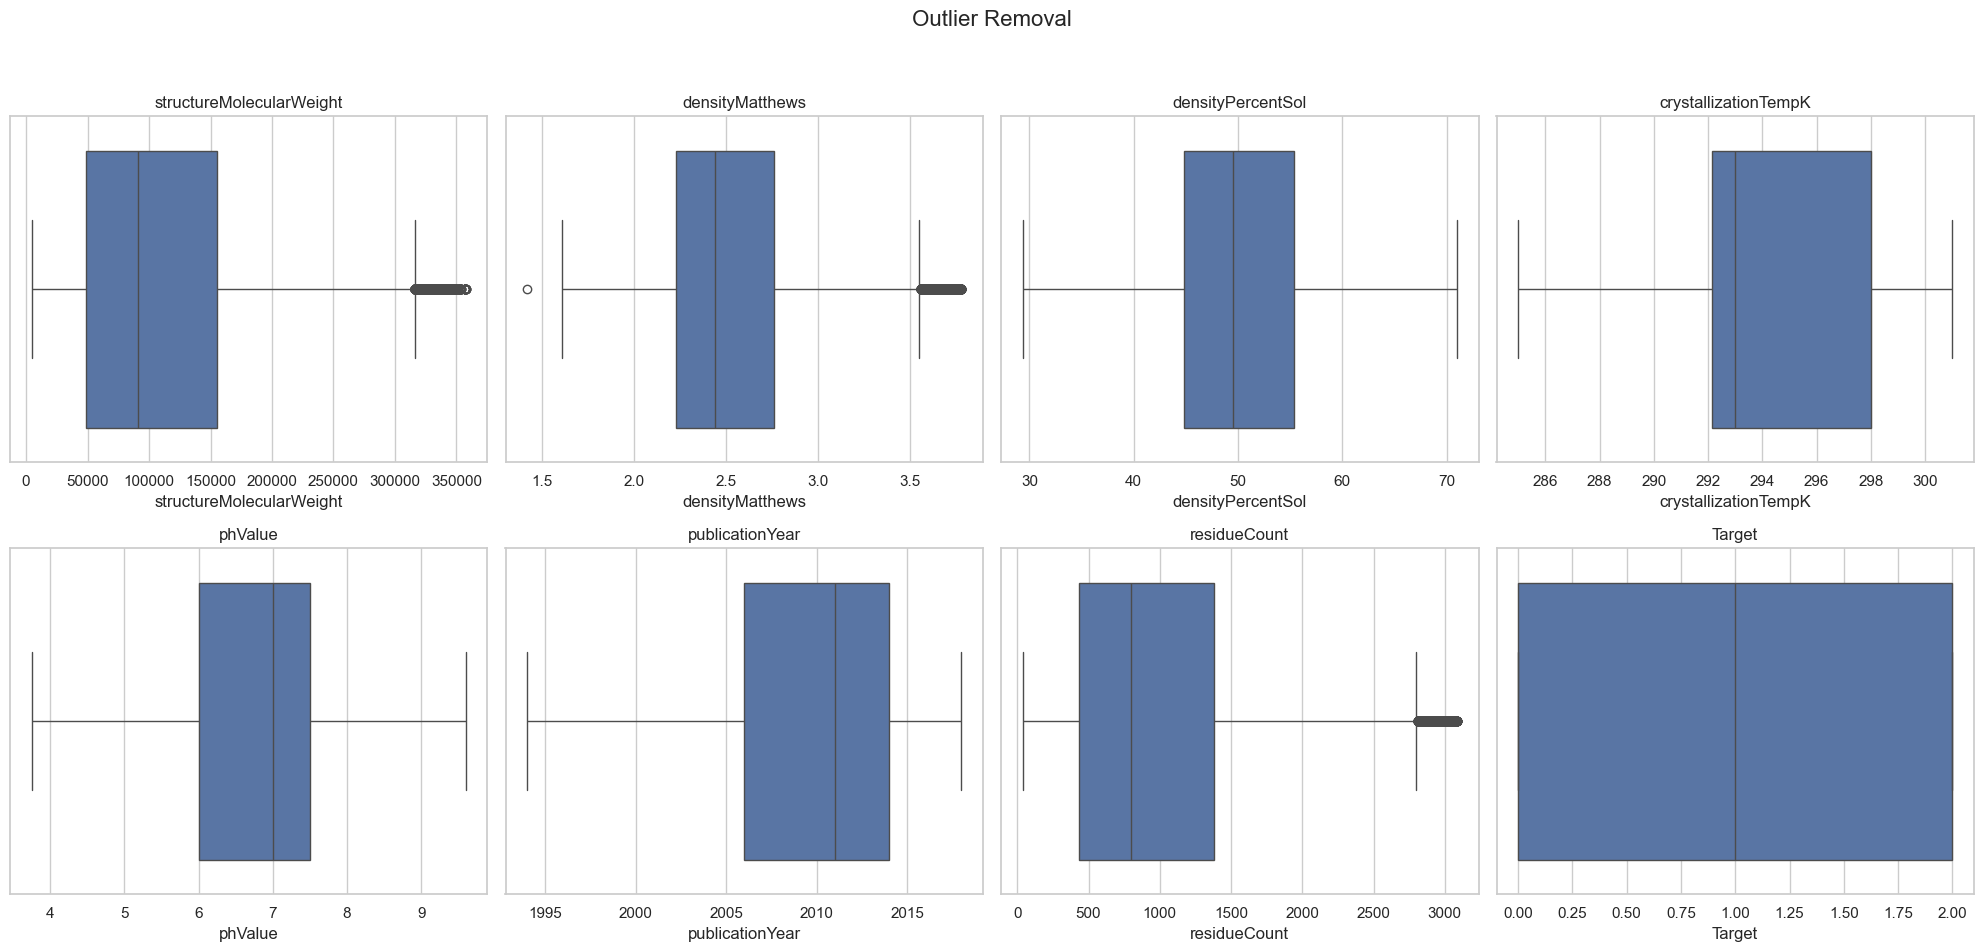

In [19]:
# List of columns to be used for plotting
columns = ["structureMolecularWeight", "densityMatthews", "densityPercentSol",
           "crystallizationTempK", "phValue", "publicationYear", "residueCount", "Target"]

# Define the figure with subplots (2 rows and 4 columns, adjust as needed)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Outlier Removal", fontsize=16)

# Create boxplots for each column in a subplot
for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(data=data_protein_base_cleaned, x=col, ax=ax)
    ax.set_title(f"{col}")

# Adjust layout to prevent overlap of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
data_encoded = data_protein_base.copy()

categorical_cols = ["macromoleculeType", "experimentalTechnique", "crystallizationMethod", "pdbxDetails", "chainId", "sequence"]

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  # simpan encoder untuk kolom ini

joblib.dump(label_encoders, "label_encoders.joblib")


['label_encoders.joblib']

In [21]:
# Viewing dataset
data_encoded

,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount,Target
912,4,0,2.60,40658.50,97,277.0,2.30,46.82,13445,8.40,1998.0,10,13864,374,2
2184,4,0,1.90,45428.53,155,277.0,2.05,32.00,16821,6.10,1996.0,10,1119,402,2
2185,4,0,1.90,45428.53,155,277.0,2.05,32.00,16821,6.10,1996.0,41,1119,402,2
2186,4,0,1.60,45430.34,155,277.0,2.04,32.20,16825,6.15,1996.0,10,1119,402,2
2187,4,0,1.60,45430.34,155,277.0,2.04,32.20,16825,6.15,1996.0,41,1119,402,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468599,4,0,4.50,134096.44,101,298.0,3.00,58.94,6852,8.00,2018.0,103,12633,1134,0
468892,4,0,2.45,47994.95,95,291.0,2.61,56.00,12183,7.30,2018.0,10,1832,424,0
468893,4,0,2.45,47994.95,95,291.0,2.61,56.00,12183,7.30,2018.0,41,1832,424,0
468894,4,0,2.45,47994.95,95,291.0,2.61,56.00,12183,7.30,2018.0,72,2059,424,0


In [22]:
# Calculate the correlation matrix

correlation_matrix = data_encoded.corr().T
correlation_matrix

,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount,Target
experimentalTechnique,1.000000,0.000709,-0.008541,0.005883,-0.007245,-0.006460,0.006748,0.005185,-0.002600,0.002817,-0.005746,0.003330,0.004541,0.005808,0.008957
macromoleculeType,0.000709,1.000000,0.054860,0.046568,-0.000401,-0.024098,0.027833,0.030597,-0.010052,-0.010179,0.058238,0.037112,-0.039024,0.041215,-0.016982
resolution,-0.008541,0.054860,1.000000,0.473652,-0.025613,-0.007977,0.429978,0.430347,-0.022240,0.059087,0.011778,0.304081,0.034839,0.472940,0.007928
structureMolecularWeight,0.005883,0.046568,0.473652,1.000000,-0.017873,-0.005195,0.234578,0.253713,-0.050759,0.036225,0.064441,0.470744,0.089119,0.995981,0.039755
crystallizationMethod,-0.007245,-0.000401,-0.025613,-0.017873,1.000000,0.038830,-0.067158,-0.060356,-0.047955,0.002212,-0.047956,-0.055381,-0.005887,-0.011870,-0.043108
crystallizationTempK,-0.006460,-0.024098,-0.007977,-0.005195,0.038830,1.000000,-0.069683,-0.076607,-0.011380,-0.010165,0.029394,-0.010108,-0.003422,-0.003929,-0.038450
densityMatthews,0.006748,0.027833,0.429978,0.234578,-0.067158,-0.069683,1.000000,0.940586,0.003395,0.001068,-0.005482,0.192814,0.029941,0.228962,0.053922
densityPercentSol,0.005185,0.030597,0.430347,0.253713,-0.060356,-0.076607,0.940586,1.000000,-0.006488,0.009538,0.002143,0.206311,0.039682,0.246630,0.060437
pdbxDetails,-0.002600,-0.010052,-0.022240,-0.050759,-0.047955,-0.011380,0.003395,-0.006488,1.000000,-0.011749,-0.392579,-0.039047,-0.029049,-0.048762,0.070324
phValue,0.002817,-0.010179,0.059087,0.036225,0.002212,-0.010165,0.001068,0.009538,-0.011749,1.000000,0.015507,0.005957,0.011024,0.034020,0.042313


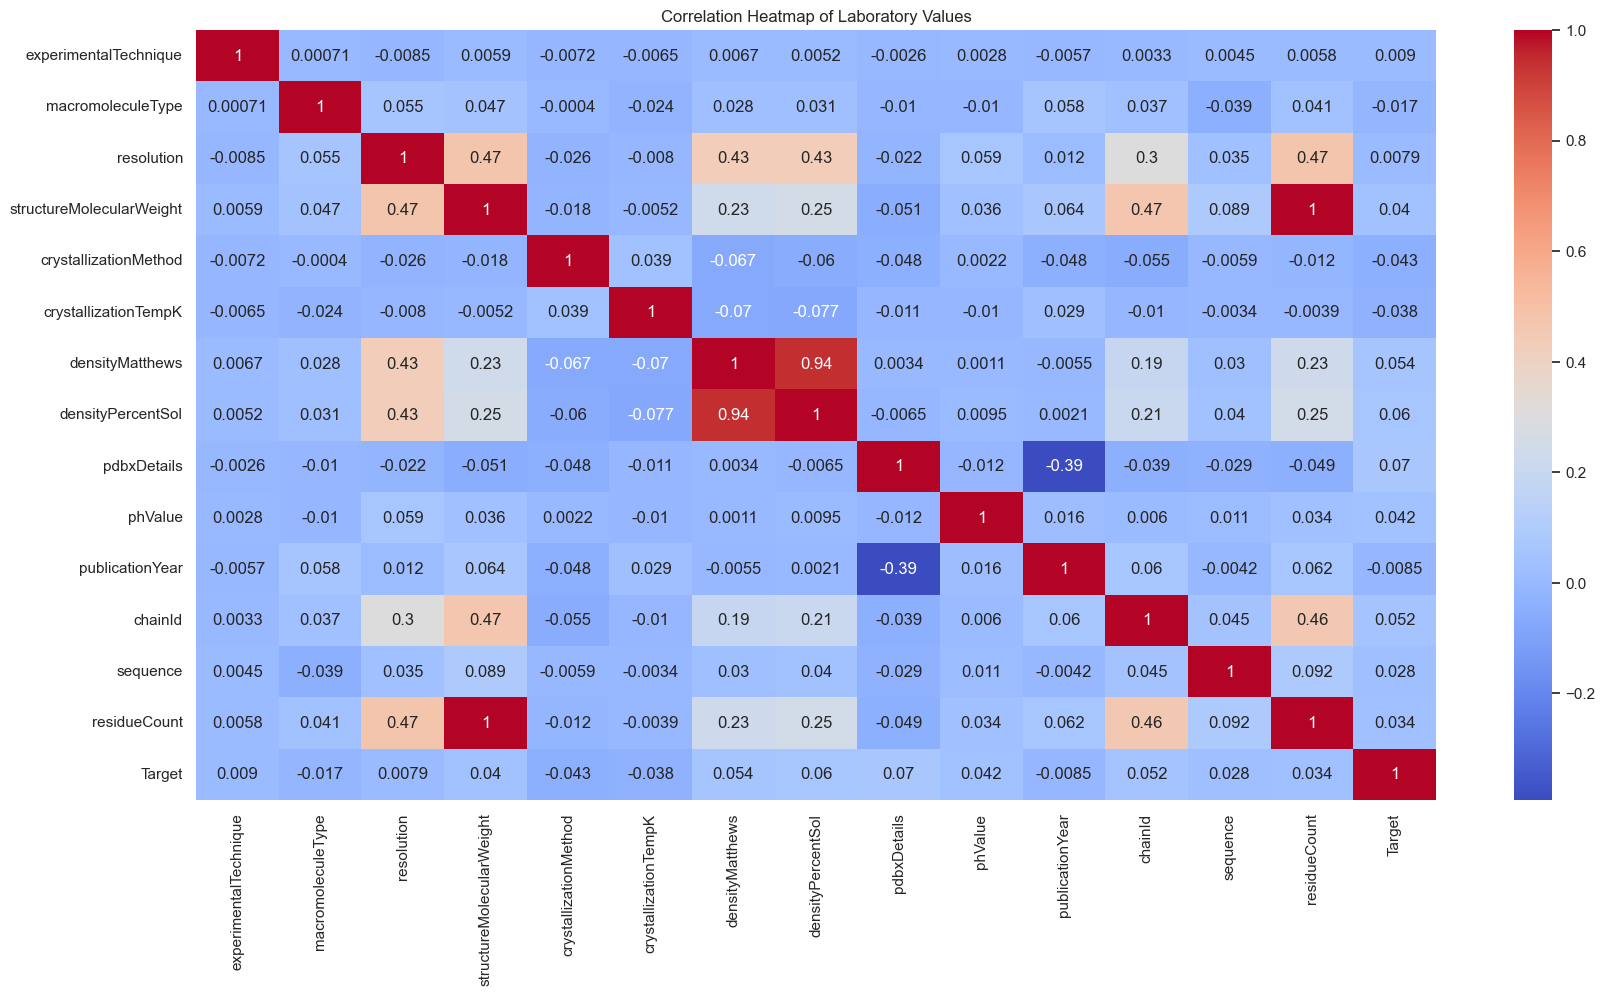

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Laboratory Values')
plt.show()

<Axes: xlabel='residueCount', ylabel='structureMolecularWeight'>

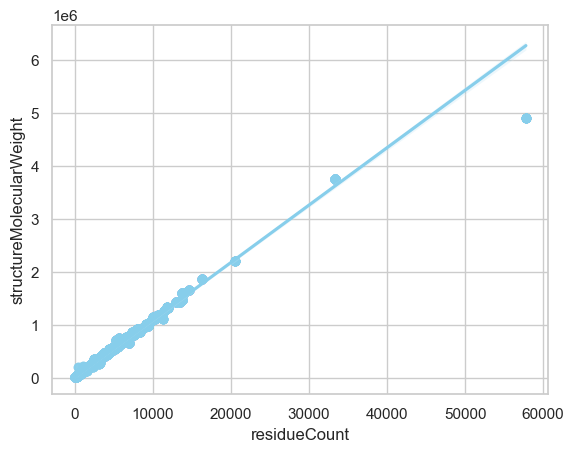

In [24]:
sns.regplot(x="residueCount", y="structureMolecularWeight", data=data_encoded, color='skyblue')

<Axes: xlabel='densityPercentSol', ylabel='densityMatthews'>

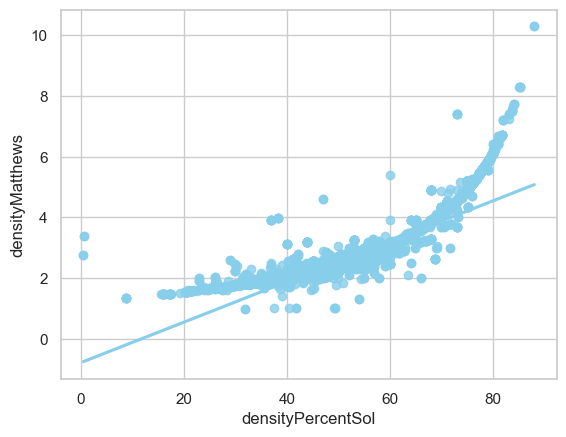

In [25]:
sns.regplot(x="densityPercentSol", y="densityMatthews", data=data_encoded, color='skyblue')

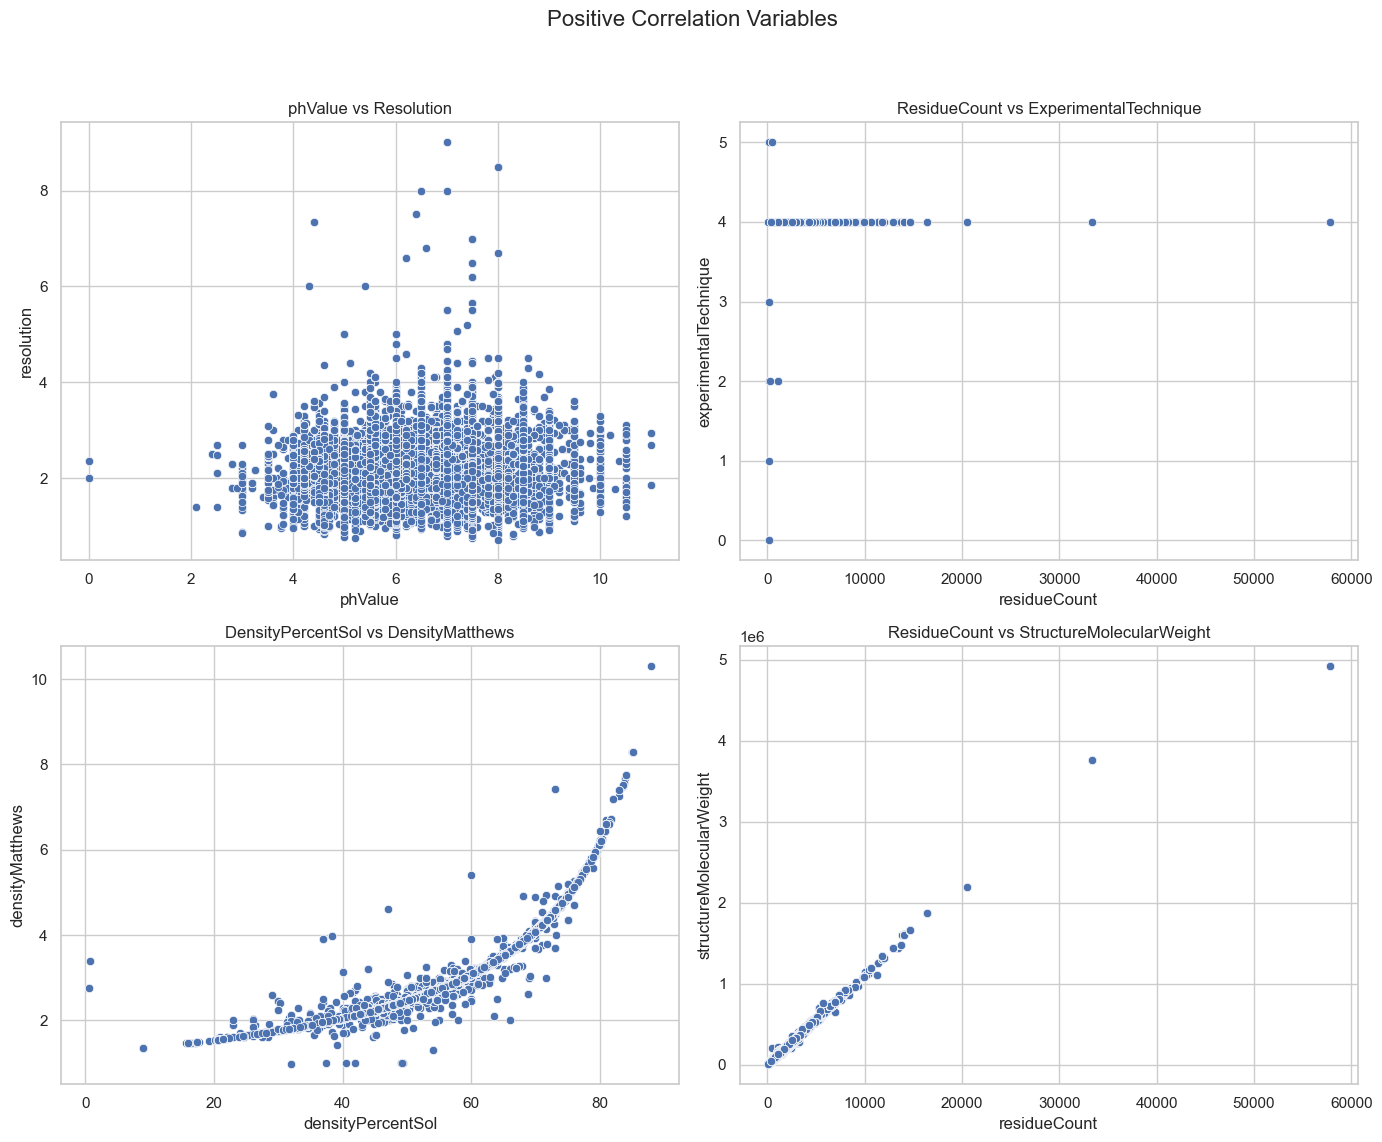

In [26]:
# Define the figure and subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Positive Correlation Variables", fontsize=16)

# Scatterplot 1: phValue vs resolution
sns.scatterplot(x="phValue", y="resolution", data=data_encoded, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title("phValue vs Resolution")

# Scatterplot 2: residueCount vs experimentalTechnique
sns.scatterplot(x="residueCount", y="experimentalTechnique", data=data_encoded, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title("ResidueCount vs ExperimentalTechnique")

# Scatterplot 3: densityPercentSol vs densityMatthews
sns.scatterplot(x="densityPercentSol", y="densityMatthews", data=data_encoded, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title("DensityPercentSol vs DensityMatthews")

# Scatterplot 4: residueCount vs structureMolecularWeight
sns.scatterplot(x="residueCount", y="structureMolecularWeight", data=data_encoded, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title("ResidueCount vs StructureMolecularWeight")

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
# Resources
X = data_encoded.drop(columns=['Target', 'structureMolecularWeight', 'densityMatthews', 'pdbxDetails'])

# Target variable
y = data_encoded['Target']

In [28]:
# Visualizing data x
X.shape
print(X.head(10))

# Viewing y data
y.shape


      experimentalTechnique  macromoleculeType  resolution  \
912                       4                  0        2.60   
2184                      4                  0        1.90   
2185                      4                  0        1.90   
2186                      4                  0        1.60   
2187                      4                  0        1.60   
2368                      4                  0        2.33   
2369                      4                  0        2.33   
2373                      4                  0        2.10   
2447                      4                  0        1.55   
2448                      4                  0        1.55   

      crystallizationMethod  crystallizationTempK  densityPercentSol  phValue  \
912                      97                 277.0              46.82     8.40   
2184                    155                 277.0              32.00     6.10   
2185                    155                 277.0              32.00     6

(58211,)

In [29]:
from sklearn.model_selection import train_test_split

# Pertama, split jadi training 70% dan sisanya 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Kedua, split sisa 30% tadi jadi testing 20% dan validation 10%
# Karena sisa 30% itu, kita bagi jadi 20/30 = 2/3 testing dan 10/30 = 1/3 validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Cek ukuran data
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Validation set:", X_val.shape, y_val.shape)


Training set: (40747, 11) (40747,)
Testing set: (11642, 11) (11642,)
Validation set: (5822, 11) (5822,)


In [30]:
print("Distribusi kelas pada data TRAIN:")
print(pd.Series(y_train).value_counts())

print("\nDistribusi kelas pada data TEST:")
print(pd.Series(y_test).value_counts())

# Kalau ada data validasi
print("\nDistribusi kelas pada data VALIDASI:")
print(pd.Series(y_val).value_counts())


Distribusi kelas pada data TRAIN:
Target
0    16125
1    12724
2    11898
Name: count, dtype: int64

Distribusi kelas pada data TEST:
Target
0    4586
1    3612
2    3444
Name: count, dtype: int64

Distribusi kelas pada data VALIDASI:
Target
0    2326
1    1841
2    1655
Name: count, dtype: int64


In [31]:
from sklearn.utils import resample
import pandas as pd
import numpy as np

def undersample(X, y):
    df = pd.DataFrame(X)
    df['label'] = y

    # Ambil jumlah minimum dari semua kelas
    min_count = df['label'].value_counts().min()

    # Undersample masing-masing kelas
    dfs = []
    for label in df['label'].unique():
        df_label = df[df['label'] == label]
        df_sampled = resample(df_label, replace=False, n_samples=min_count, random_state=42)
        dfs.append(df_sampled)

    df_balanced = pd.concat(dfs).sample(frac=1, random_state=42)  # Shuffle hasilnya
    X_balanced = df_balanced.drop('label', axis=1).values
    y_balanced = df_balanced['label'].values
    return X_balanced, y_balanced

# Terapkan ke training, testing, dan validation
X_train_bal, y_train_bal = undersample(X_train, y_train)
X_test_bal, y_test_bal = undersample(X_test, y_test)
X_val_bal, y_val_bal = undersample(X_val, y_val)

# Cek hasil distribusi
print("Distribusi kelas TRAIN setelah undersampling:")
print(pd.Series(y_train_bal).value_counts())

print("\nDistribusi kelas TEST setelah undersampling:")
print(pd.Series(y_test_bal).value_counts())

print("\nDistribusi kelas VALIDASI setelah undersampling:")
print(pd.Series(y_val_bal).value_counts())


Distribusi kelas TRAIN setelah undersampling:
2    11898
0    11898
1    11898
Name: count, dtype: int64

Distribusi kelas TEST setelah undersampling:
1    3444
0    3444
2    3444
Name: count, dtype: int64

Distribusi kelas VALIDASI setelah undersampling:
2    1655
0    1655
1    1655
Name: count, dtype: int64


In [32]:
%%time
# Importing libraries for various classification models and performance evaluation
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=50, max_iter=1000),
    AdaBoostClassifier(random_state=45),
    XGBClassifier(random_state=42),
    LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, 
                   feature_fraction=0.9, bagging_freq=50, verbosity=-1, verbose=50),
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    GradientBoostingClassifier(random_state=42)
]

CPU times: total: 281 ms
Wall time: 522 ms


In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score

predictions = {}
scores = []

for i, model in enumerate(models):
    model.fit(X_train_bal, y_train_bal)

    y_pred_train = model.predict(X_train_bal)
    y_pred_test = model.predict(X_test_bal)
    y_pred_val = model.predict(X_val_bal)

    train_accuracy = accuracy_score(y_train_bal, y_pred_train)
    test_accuracy = accuracy_score(y_test_bal, y_pred_test)
    val_accuracy = accuracy_score(y_val_bal, y_pred_val)

    predictions[type(model).__name__] = y_pred_test

    scores.append({
        'Model': type(model).__name__,
        'Training Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy,
        'Testing Accuracy': test_accuracy,
        'Prediction Accuracy': test_accuracy  # sama seperti testing accuracy
    })

df_scores = pd.DataFrame(scores)
print(df_scores)


                        Model  Training Accuracy  Validation Accuracy  \
0                  GaussianNB           0.365972             0.363545   
1      DecisionTreeClassifier           0.999972             0.880363   
2      RandomForestClassifier           0.999972             0.918429   
3          LogisticRegression           0.388301             0.383887   
4          AdaBoostClassifier           0.525466             0.526284   
5               XGBClassifier           0.882025             0.806244   
6              LGBMClassifier           0.707962             0.671501   
7        KNeighborsClassifier           0.872416             0.787513   
8  GradientBoostingClassifier           0.608898             0.593152   

   Testing Accuracy  Prediction Accuracy  
0          0.368951             0.368951  
1          0.882888             0.882888  
2          0.922861             0.922861  
3          0.397987             0.397987  
4          0.526616             0.526616  
5          

In [35]:
# # Print the model scores
# print("Model Scores")
# for model_name, score in scores.items():
#     print()
#     print(f"{model_name}: {score}")
    
# Menampilkan 20 prediksi pertama dan actual target untuk setiap model
print("Model Predictions vs Actual Targets (first 20):")
for model_name, preds in predictions.items():
    print(f"\n{model_name}:")
    comparison_df = pd.DataFrame({
        'Predicted': preds[:20],
        'Actual': y_test_bal[:20]
    })
    print(comparison_df)


Model Predictions vs Actual Targets (first 20):

GaussianNB:
    Predicted  Actual
0           2       1
1           1       0
2           0       2
3           0       0
4           0       2
5           0       0
6           0       2
7           2       2
8           0       0
9           0       0
10          2       0
11          2       2
12          0       0
13          0       2
14          0       0
15          2       1
16          0       2
17          0       2
18          2       2
19          0       0

DecisionTreeClassifier:
    Predicted  Actual
0           1       1
1           0       0
2           2       2
3           1       0
4           2       2
5           0       0
6           2       2
7           2       2
8           0       0
9           2       0
10          0       0
11          2       2
12          0       0
13          2       2
14          0       0
15          1       1
16          2       2
17          2       2
18          2       2
19          

In [36]:
print("Akurasi Prediksi (Seluruh Data Test) per Model:\n")

for model_name, preds in predictions.items():
    actual = y_test_bal  # Data aktual dari y_test
    correct = sum(preds == actual)  # Hitung jumlah prediksi benar
    accuracy = correct / len(actual) * 100  # Hitung akurasi dalam persen

    print(f"{model_name}: {correct}/{len(actual)} benar ({accuracy:.2f}%)")


Akurasi Prediksi (Seluruh Data Test) per Model:

GaussianNB: 3812/10332 benar (36.90%)
DecisionTreeClassifier: 9122/10332 benar (88.29%)
RandomForestClassifier: 9535/10332 benar (92.29%)
LogisticRegression: 4112/10332 benar (39.80%)
AdaBoostClassifier: 5441/10332 benar (52.66%)
XGBClassifier: 8382/10332 benar (81.13%)
LGBMClassifier: 7011/10332 benar (67.86%)
KNeighborsClassifier: 8173/10332 benar (79.10%)
GradientBoostingClassifier: 6202/10332 benar (60.03%)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models for comparison
models = [('Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier(random_state=42)),
          ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
          ('Logistic Regression', LogisticRegression(random_state=50, max_iter=1000)),
          ('AdaBoost', AdaBoostClassifier(random_state=45)),
          ('XGBoost', XGBClassifier(random_state=42)),
          ('LightGBM', LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9,
                                      learning_rate=0.05, feature_fraction=0.9,
                                      bagging_freq=50, verbosity=-1)),
          ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
          ('Gradient Boosting', GradientBoostingClassifier(random_state=42))]

# List to store the metrics of each model
metrics_list = []

# Iterate over the models
for model_name, model in models:
    # Train the model on undersampled training set
    model.fit(X_train_bal, y_train_bal)

    # Make predictions on the undersampled test set
    y_pred = model.predict(X_test_bal)

    # Calculate the metrics
    accuracy = accuracy_score(y_test_bal, y_pred)
    precision = precision_score(y_test_bal, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_bal, y_pred, average='weighted')
    f1 = f1_score(y_test_bal, y_pred, average='weighted')

    # Store the metrics of this model
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on F1-Score
best_model_idx = metrics_df['F1-Score'].idxmax()

# Function to highlight the best model with a yellow background
def highlight_best(s):
    return ['background-color: yellow' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the DataFrame with the best model highlighted
styled_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.368951,0.357861,0.368951,0.318082
1,Decision Tree,0.882888,0.882755,0.882888,0.882776
2,Random Forest,0.922861,0.923654,0.922861,0.923076
3,Logistic Regression,0.397987,0.399997,0.397987,0.396730
4,AdaBoost,0.526616,0.530159,0.526616,0.525585
5,XGBoost,0.811266,0.813290,0.811266,0.811414
6,LightGBM,0.678571,0.683592,0.678571,0.678404
7,K-Nearest Neighbors,0.791038,0.791562,0.791038,0.791240
8,Gradient Boosting,0.600271,0.605367,0.600271,0.599558


Training Random Forest...


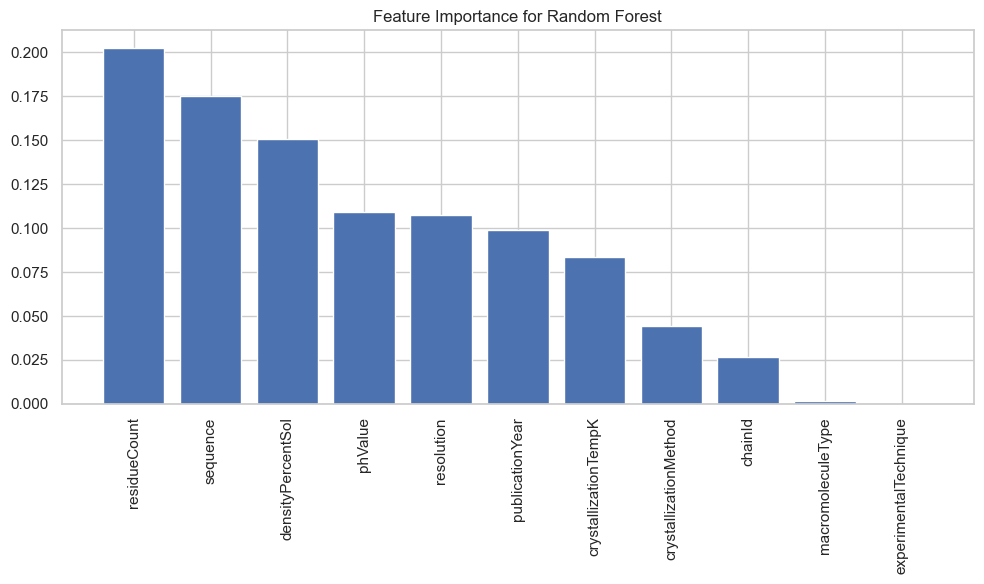

------------------------------------------------------------


In [38]:
# Pilih best model, misalnya Random Forest
best_model = {
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Ubah X_train_bal dari array ke DataFrame dan gunakan nama kolom dari X
import pandas as pd

X_train_bal = pd.DataFrame(X_train_bal, columns=X.columns)
X_test_bal = pd.DataFrame(X_test_bal, columns=X.columns)

# Get the feature names
feature_names = X_train_bal.columns  # Gunakan dari data hasil undersampling

# Iterate over the models
for model_name, model in best_model.items():
    print(f"Training {model_name}...")

    # Train the model on the undersampled training set
    model.fit(X_train_bal, y_train_bal)

    # Plot feature importance for models that support it
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train_bal.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train_bal.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    elif isinstance(model, LogisticRegression):
        # For Logistic Regression, use the coefficients
        importance = np.abs(model.coef_[0])
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train_bal.shape[1]), importance[indices], align="center")
        plt.xticks(range(X_train_bal.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.grid(False)
        plt.show()

    else:
        print(f"Feature importance not available for {model_name}")
    
    print("-" * 60)


In [39]:
import joblib  # atau bisa pakai pickle juga

# Setelah training dan evaluasi selesai, simpan model terbaik ke file
best_model_name = metrics_df.loc[best_model_idx, 'Model']
best_model = None

# Cari objek model terbaik dari list models
for name, model in models:
    if name == best_model_name:
        best_model = model
        break

# Simpan model terbaik ke file .joblib
model_filename = f"{best_model_name}_best_model.joblib"
joblib.dump(best_model, model_filename)
print(f"Model terbaik '{best_model_name}' disimpan ke {model_filename}")




Model terbaik 'Random Forest' disimpan ke Random Forest_best_model.joblib


Training Random Forest...


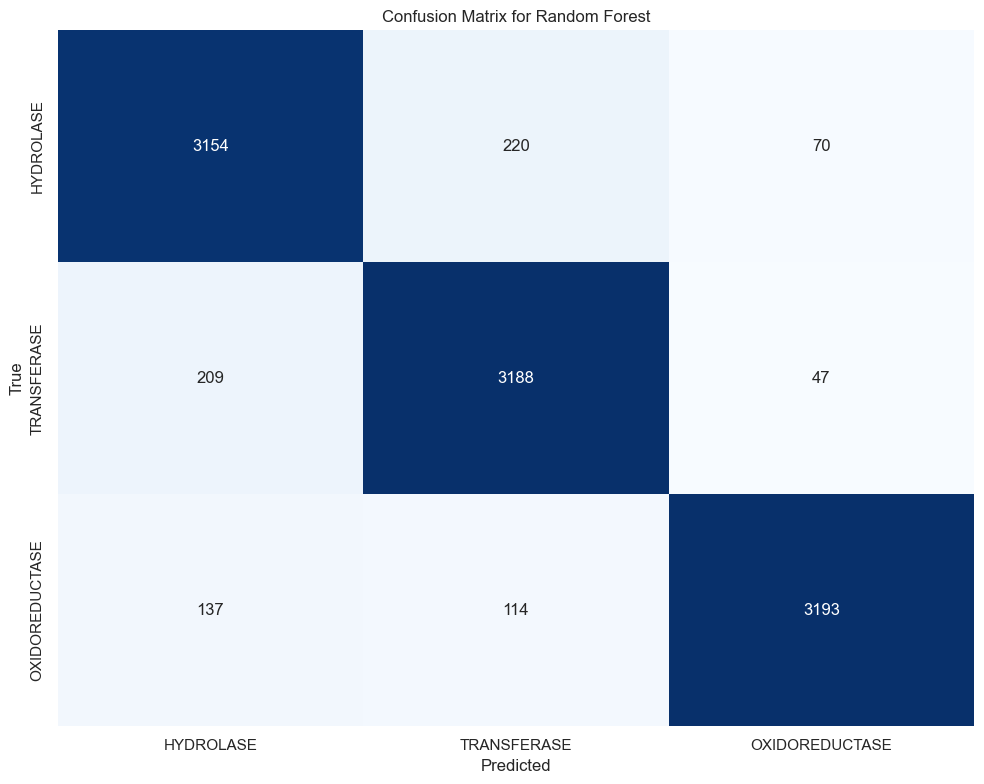

------------------------------------------------------------


In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ["HYDROLASE", "TRANSFERASE", "OXIDOREDUCTASE"]

model_name = best_model_name  # Ganti sesuai nama modelmu, misal "Random Forest"
model = best_model  # pastikan ini model instance, bukan dictionary

print(f"Training {model_name}...")

# Train the model
model.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred = model.predict(X_test_bal)

# Compute confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix for {model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
print("-" * 60)


Training Random Forest...


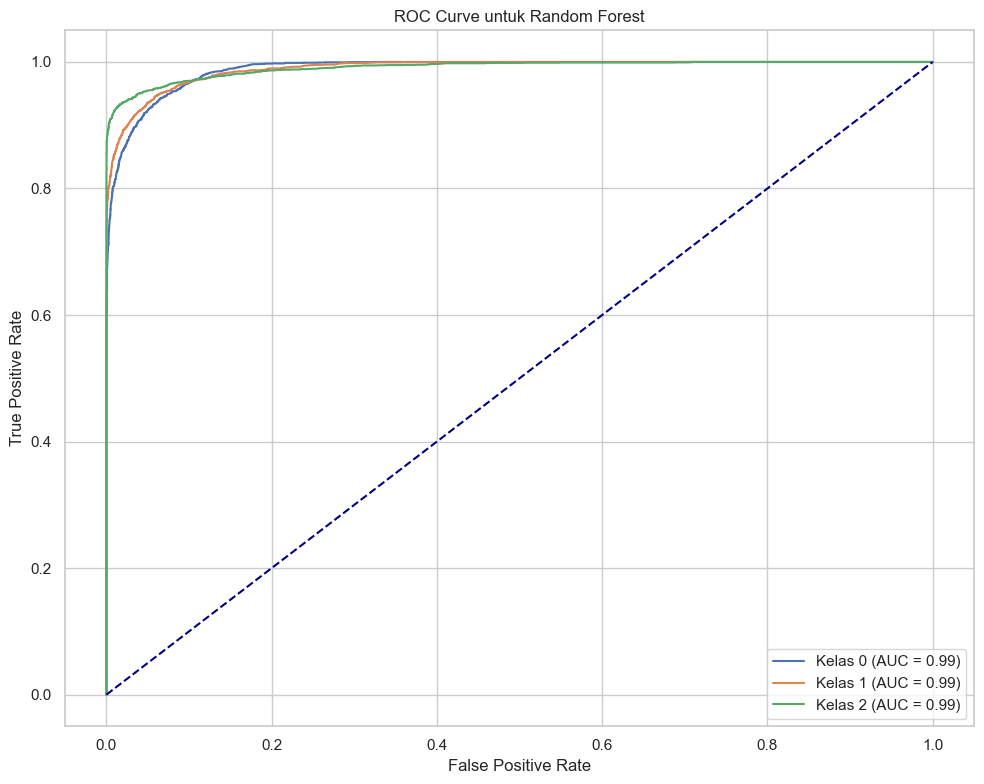

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Misal kelasnya sama, ambil kelas dari y_train_bal
classes = np.unique(y_train_bal)
model_name = best_model_name  # Ganti sesuai nama modelmu, misal "Random Forest"
model = best_model

# Binarize target untuk ROC curve (One-vs-Rest)
y_test_bin = label_binarize(y_test_bal, classes=classes)
y_train_bin = label_binarize(y_train_bal, classes=classes)

# Loop model terbaik (misal best_model sudah ada)

print(f"Training {model_name}...")

    # One-vs-Rest untuk klasifikasi multi-class
classifier = OneVsRestClassifier(model)
classifier.fit(X_train_bal, y_train_bal)  # pake data hasil undersampling

    # Prediksi probabilitas di test set undersampling
y_prob = classifier.predict_proba(X_test_bal)

    # Cek NaN
if np.isnan(y_prob).sum() > 0:
    print(f"Ada NaN pada prediksi model {model_name}, skip model ini.")

    # Plot ROC curve per kelas
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Kelas {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve untuk {model_name}")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [42]:
from sklearn.metrics import classification_report

# Misalnya best_model adalah satu model, bukan dictionary
# contoh: best_model = RandomForestClassifier(random_state=42)

print(f"Training model {model_name}")

# Latih model
model.fit(X_train_bal, y_train_bal)

# Prediksi pada test set
y_pred = model.predict(X_test_bal)

# Tampilkan classification report
print("Classification Report:")
report = classification_report(y_test_bal, y_pred)
print(report)
print("-" * 60)


Training model Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3444
           1       0.91      0.93      0.92      3444
           2       0.96      0.93      0.95      3444

    accuracy                           0.92     10332
   macro avg       0.92      0.92      0.92     10332
weighted avg       0.92      0.92      0.92     10332

------------------------------------------------------------


In [ ]:
print(model)

RandomForestClassifier(random_state=42)


Protein Predictions

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Definisikan mapping asam amino ke angka
def preprocess_sequence(sequence):
    amino_acids = {
        'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4,
        'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9,
        'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14,
        'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19
    }
    return [amino_acids.get(aa, -1) for aa in sequence]  # -1 untuk unknown

# List sequence baru
new_sequences = [
    "AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL",
    "GATTACAAGGTTAGGTTGATC", "EHDRWQYAVFKQQKRNRFAHILANYGVCRD", "SMMPKVYEEPIDMEEWTFHSCKGVGNYVHY",
    "CCDDRRVRRWRCDPILVANIYYKECYETEG", "EMCPADPWFVCSYAPDVKTGLPWSNNRFGE", "GNLVSDDRMVWTESIDGEEVCSWFPIHVWK",
    "NLHCEVAQKCHIFNIRPRADKRWDTGHLMN", "IRGWIACKLKSSYATIKMQRSIVQNVQHEK", "GHDYPWMTAHHQVETGVHIRSDDAGEFTCP",
    "DFFLTEQYAYPHNIWWCESCWKMHGDYSEQ", "SMWAPSNVDQFWSMEQQRAFWGNMIKYRYL", "KIYTWQFYRNHWFQGFDRHADFKIFFPNMQ",
    "RYPHKARIGWPKNCECTPDLTDMYMIWVMV", "RVTIEWDSGKFKNLIAAELQMCKGEYAGIK", "LMYEDGVCGCCHHRWRTQRYQAKVCGYCSF",
    "GSLMKQGVFIIKPPQTKQQVDMAKVWGYEY", "RKMCYCYDASRECKMFYKWGPVLRYWHVKK", "TGGYNPYLAYTLLIYCQVSEAYNPELFLPI",
    "PIQRHEYNAPHVWNYIFCEHKFRHHKNVFN", "EVGLTAVQPMYGGYDHVMEIRHKCGMRWVF", "KPADSCLQHMIASNLFHIKPAQDIPVVVYA",
    "LVSDTSQFLEYGAIYSTTFLFWEHKISSID", "NSCAGHCGFCHGDAQMSIEGHIRHQQFTFM", "EWSINVAYPQMCIIMVQDECHRWFQYVNGL",
    "NFHAMNCEMHIWNRRRLLHVILNWNRIRTW", "CKCFHLGNTAHCIHSMIRDFPKLLKPMVNF"
]

# Preprocessing: konversi dan padding
X_new = [preprocess_sequence(seq) for seq in new_sequences]

# Gunakan max_length yang sama dengan saat training modelmu
max_length = 11  # ganti sesuai dengan training

X_new_padded = pad_sequences(X_new, maxlen=max_length, padding='post', truncating='post')

# Pastikan ini adalah numpy array
X_new_padded = np.array(X_new_padded)

# Prediksi probabilitas tiap kelas
predictions = model.predict(X_new_padded)

# Ambil kelas dengan probabilitas tertinggi
predicted_classes = predictions

# (Opsional) buat label nama kelas agar hasil prediksi lebih jelas
label_names = {0: 'HYDROLASE', 1: 'TRANSFERASE', 2: 'OXIDOREDUCTASE'}

# Tampilkan hasil prediksi dengan label nama kelas
for seq, pred_class in zip(new_sequences, predicted_classes):
    print(f"Sequence: {seq}\nPredicted Class: {pred_class} ({label_names.get(pred_class, 'Unknown')})\n")


Sequence: AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL
Predicted Class: 0 (HYDROLASE)

Sequence: GATTACAAGGTTAGGTTGATC
Predicted Class: 0 (HYDROLASE)

Sequence: EHDRWQYAVFKQQKRNRFAHILANYGVCRD
Predicted Class: 0 (HYDROLASE)

Sequence: SMMPKVYEEPIDMEEWTFHSCKGVGNYVHY
Predicted Class: 0 (HYDROLASE)

Sequence: CCDDRRVRRWRCDPILVANIYYKECYETEG
Predicted Class: 0 (HYDROLASE)

Sequence: EMCPADPWFVCSYAPDVKTGLPWSNNRFGE
Predicted Class: 0 (HYDROLASE)

Sequence: GNLVSDDRMVWTESIDGEEVCSWFPIHVWK
Predicted Class: 0 (HYDROLASE)

Sequence: NLHCEVAQKCHIFNIRPRADKRWDTGHLMN
Predicted Class: 0 (HYDROLASE)

Sequence: IRGWIACKLKSSYATIKMQRSIVQNVQHEK
Predicted Class: 0 (HYDROLASE)

Sequence: GHDYPWMTAHHQVETGVHIRSDDAGEFTCP
Predicted Class: 0 (HYDROLASE)

Sequence: DFFLTEQYAYPHNIWWCESCWKMHGDYSEQ
Predicted Class: 0 (HYDROLASE)

Sequence: SMWAPSNVDQFWSMEQQRAFWGNMIKYRYL
Predicted Class: 0 (HYDROLASE)

Sequence: KIYTWQFYRNHWFQGFDRHADFKIFFPNMQ
Predicted Class: 0 (HYDROLASE)

Sequence: RYPHKARIGWPKNCECTPDLTDMYMIWVMV
Pre